# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from nltk.stem import WordNetLemmatizer 
%matplotlib inline

In [2]:
# Retrieve the News API key
api_key = os.getenv("news_api")

In [3]:
# Create the newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="bitcoin",language="en",sort_by="relevancy")
bitcoin.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [5]:
# Fetch the Ethereum news articles
etheruem = newsapi.get_everything(q="ethereum",language="en",sort_by="relevancy")
etheruem.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [6]:
def sentiment_analizyer(articles_list):
    bitcoin_sentiment = []
    for c in articles_list:
        try:
            text = c["content"]
            date = c["publishedAt"]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            bitcoin_sentiment.append({
                "text":text,
                "positive":pos,
                "negative":neg,
                "neutral":neu,
                "compound":compound
            })
        except AttributeError:
            pass
    bitcoin_df = pd.DataFrame(bitcoin_sentiment)
    cols = [ "compound","negative","neutral","positive","text",   ]
    bitcoin_df = bitcoin_df[cols]
    return bitcoin_df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = sentiment_analizyer(bitcoin["articles"])
bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...
1,0.2263,0.000,0.951,0.049,"Two days ago, about $1 billion worth of bitcoi..."
2,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...
3,-0.7184,0.154,0.846,0.000,The Financial Crimes Enforcement Network (FinC...
4,0.2500,0.000,0.941,0.059,"2018’s jokes are 2020’s reality. I’m speaking,..."


In [8]:
# Create the ethereum sentiment scores DataFrame
etheruem_df = sentiment_analizyer(etheruem["articles"])
etheruem_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...
1,0.0000,0.000,1.000,0.000,Breitling is partnering with Arianee to issue ...
2,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...
3,-0.4215,0.132,0.783,0.085,Portions of the global economy melted down in ...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A worker pushing a trolley walks w...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.00000,20.000000,20.000000,20.000000
mean,0.01132,0.049950,0.898200,0.051800
std,0.46116,0.078992,0.092502,0.069552
min,-0.71840,0.000000,0.716000,0.000000
25%,-0.27890,0.000000,0.826750,0.000000
50%,0.00000,0.000000,0.928500,0.020500
75%,0.25580,0.077250,1.000000,0.071750
max,0.82250,0.215000,1.000000,0.229000


In [10]:
# Describe the Ethereum Sentiment
etheruem_df.describe()

,compound,negative,neutral,positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.168438,0.016188,0.922813,0.061062
std,0.366023,0.037754,0.091890,0.083940
min,-0.421500,0.000000,0.703000,0.000000
25%,0.000000,0.000000,0.861500,0.000000
50%,0.000000,0.000000,0.942000,0.023000
75%,0.416125,0.000000,1.000000,0.083500
max,0.946800,0.132000,1.000000,0.297000


### Questions:

Q: Which coin had the highest mean positive score?

A: **The ``bitcoin`` beats the ``etheruem`` by just .02.**

Q: Which coin had the highest compound score?

A: **``Etheruem`` has a score of .912 while ``bitcoin`` only has a score of .822**

Q. Which coin had the highest positive score?

A: **``Etheruem`` had the highest postive score**

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
from nltk.tokenize import RegexpTokenizer

In [12]:
# Expand the default stopwords list if necessary
sw_1 = set(stopwords.words('english'))
sw_2 = set([",",".","[","]","?","(",")","-","$","-"])
sw = sw_1.union(sw_2)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sentence_tokenized = [sent_tokenize(i) for i in text]
    # --------------------------------------------------------------------------------------------------    
    word_tokenized = []
    for story in sentence_tokenized:
        words = []
        for sent in story:
            words = words + word_tokenize(sent)
        word_tokenized.append(words)
# --------------------------------------------------------------------------------------------------    
    lower = []
    for i in word_tokenized:
        words = []
        for c in i:
            if c not in sw:
                words.append(c.lower())
        lower.append(words)
# --------------------------------------------------------------------------------------------------    
    re_sw = []
    for i in lower:
        sw_re =[]
        for c in i:
            if c not in sw:
                sw_re.append(c)
        re_sw.append(sw_re)
    WNL = WordNetLemmatizer()
    lemmatized = []
    for i in re_sw:
        lem =[]
        for c in i:
            lem.append(WNL.lemmatize(c))
        lemmatized.append(lem)
    tokens = lemmatized       
    return tokens


In [14]:
# Create a new tokens column for ethereum
etheruem_df["Token"] = tokenizer(etheruem_df["text"])
etheruem_df.head()

,compound,negative,neutral,positive,text,Token
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...,"[paypal, partnered, cryptocurrency, company, p..."
1,0.0000,0.000,1.000,0.000,Breitling is partnering with Arianee to issue ...,"[breitling, partnering, arianee, issue, new, k..."
2,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...,"[paypal, rolling, cryptocurrency, support, lat..."
3,-0.4215,0.132,0.783,0.085,Portions of the global economy melted down in ...,"[portion, global, economy, melted, 2020, emerg..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A worker pushing a trolley walks w...,"[file, photo, :, worker, pushing, trolley, wal..."


In [15]:
# Create a new tokens column for bitcoin
bitcoin_df["Token"] = tokenizer(bitcoin_df["text"])
bitcoin_df.head()

,compound,negative,neutral,positive,text,Token
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...,"[paypal, partnered, cryptocurrency, company, p..."
1,0.2263,0.000,0.951,0.049,"Two days ago, about $1 billion worth of bitcoi...","[two, day, ago, 1, billion, worth, bitcoin, sa..."
2,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...,"[paypal, rolling, cryptocurrency, support, lat..."
3,-0.7184,0.154,0.846,0.000,The Financial Crimes Enforcement Network (FinC...,"[financial, crime, enforcement, network, fince..."
4,0.2500,0.000,0.941,0.059,"2018’s jokes are 2020’s reality. I’m speaking,...","[2018, ’, joke, 2020, ’, reality, ’, speaking,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
def n_2(text):
    count =[]
    for i in text:
        count.append(Counter(ngrams(i, n=2)))
    return count

In [18]:
bitcoin_count = n_2(bitcoin_df["Token"])
bitcoin_count[:1]

[Counter({('paypal', 'partnered'): 1,
          ('partnered', 'cryptocurrency'): 1,
          ('cryptocurrency', 'company'): 1,
          ('company', 'paxos'): 1,
          ('paxos', 'launch'): 1,
          ('launch', 'new'): 1,
          ('new', 'service'): 1,
          ('service', 'paypal'): 1,
          ('paypal', 'user'): 1,
          ('user', 'u.s.'): 1,
          ('u.s.', 'soon'): 1,
          ('soon', 'able'): 1,
          ('able', 'buy'): 1,
          ('buy', 'hold'): 1,
          ('hold', 'sell'): 1,
          ('sell', 'cryptocurrencies'): 1,
          ('cryptocurrencies', 'country'): 1,
          ('country', 'coming'): 1,
          ('coming', 'soon'): 1,
          ('soon', 'pay…'): 1,
          ('pay…', '+2069'): 1,
          ('+2069', 'char'): 1})]

In [19]:
etheruem_count = n_2(etheruem_df["Token"])
etheruem_count[:1]

[Counter({('paypal', 'partnered'): 1,
          ('partnered', 'cryptocurrency'): 1,
          ('cryptocurrency', 'company'): 1,
          ('company', 'paxos'): 1,
          ('paxos', 'launch'): 1,
          ('launch', 'new'): 1,
          ('new', 'service'): 1,
          ('service', 'paypal'): 1,
          ('paypal', 'user'): 1,
          ('user', 'u.s.'): 1,
          ('u.s.', 'soon'): 1,
          ('soon', 'able'): 1,
          ('able', 'buy'): 1,
          ('buy', 'hold'): 1,
          ('hold', 'sell'): 1,
          ('sell', 'cryptocurrencies'): 1,
          ('cryptocurrencies', 'country'): 1,
          ('country', 'coming'): 1,
          ('coming', 'soon'): 1,
          ('soon', 'pay…'): 1,
          ('pay…', '+2069'): 1,
          ('+2069', 'char'): 1})]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(token):
    """Returns the top N tokens from the frequency count"""
    test = []
    for i in token:
        for c in i:
            test.append(c)
    top_10 = Counter(test).most_common(10)
    return top_10

In [21]:
# Get the top 10 words for Bitcoin
bitcoin_top = token_count(bitcoin_df["Token"])
bitcoin_top

[('char', 20),
 ('bitcoin', 18),
 ('reuters', 10),
 ('taken', 7),
 ('paypal', 6),
 ("'s", 6),
 ('cryptocurrency', 5),
 ('illustration', 5),
 ('…', 5),
 ('virtual', 5)]

In [22]:
# Get the top 10 words for Ethereum
ethereum_top = token_count(etheruem_df["Token"])
ethereum_top

[('char', 16),
 ('paypal', 10),
 ('cryptocurrency', 8),
 ('bitcoin', 8),
 ('wednesday', 7),
 ('u.s.', 6),
 ('2020', 6),
 ('buy', 5),
 ('hold', 5),
 ('sell', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
def word_cloud(terms,title):
    terms_list = str(terms)
    wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
    plt.imshow(wordcloud)
    plt.axis("off")
    fontdict = {"fontsize": 20, "fontweight": "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    return plt

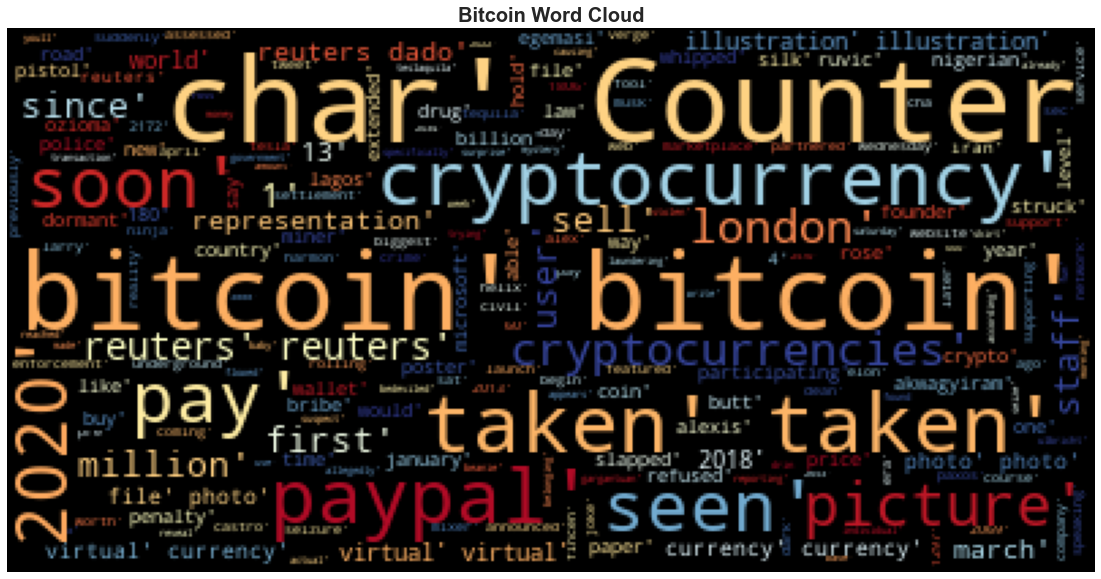

In [25]:
bitcoin_wordcloud = word_cloud(bitcoin_count, "Bitcoin Word Cloud")

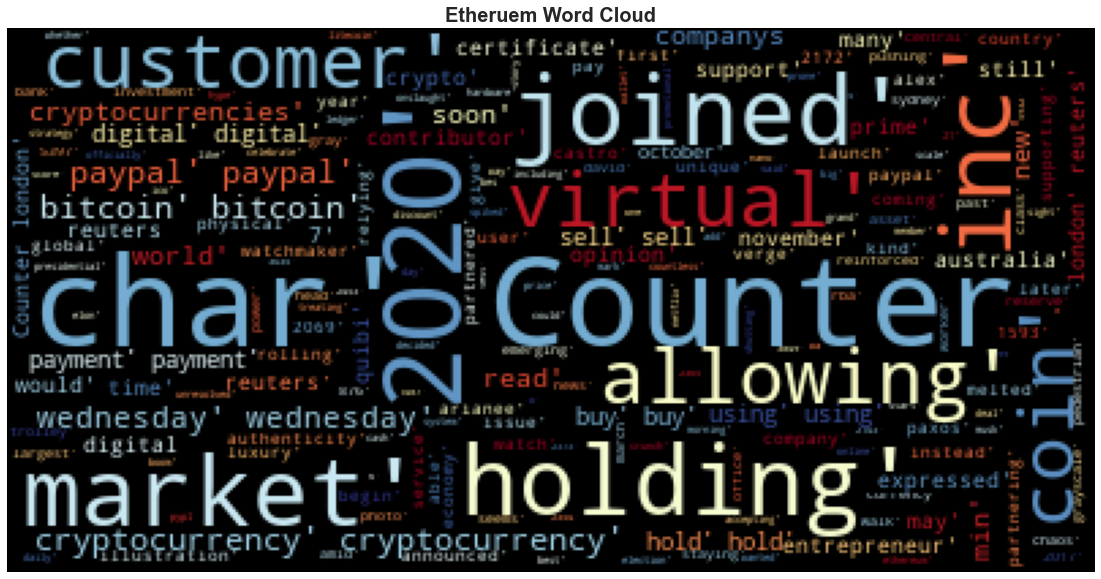

In [26]:
etheruem_wordCloud = word_cloud(etheruem_count, "Etheruem Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [34]:
for i in bitcoin_df["text"]:
    print(i)

PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.
Pay… [+2069 chars]
Two days ago, about $1 billion worth of bitcoin that had sat dormant since the seizure of the Silk Road marketplace in 2013, one of the biggest underground drug websites on the dark web, suddenly cha… [+1297 chars]
PayPal is rolling out cryptocurrency support later this year
Illustration by Alex Castro / The Verge
PayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars]
The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars]
2018’s jokes are 2020’s reality. I’m speaking, of course, about Tesla Tequila. Previously featured in an April Fool’s tweet from Elon Musk (pre

In [29]:
def NER(articles):
    doc = []
    for i in articles:
        doc.append(nlp(i))
    return doc

In [30]:
# Run the NER processor on all of the text
bitcoin_concat = NER(bitcoin_df["text"])
bitcoin_concat

[PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.
 Pay… [+2069 chars],
 Two days ago, about $1 billion worth of bitcoin that had sat dormant since the seizure of the Silk Road marketplace in 2013, one of the biggest underground drug websites on the dark web, suddenly cha… [+1297 chars],
 PayPal is rolling out cryptocurrency support later this year
 Illustration by Alex Castro / The Verge
 PayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars],
 The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars],
 2018’s jokes are 2020’s reality. I’m speaking, of course, about Tesla Tequila. Previously featured in an April Fool’s tweet from El

In [31]:
# Render the visualization
displacy.render(bitcoin_concat,style='ent')

---

## Ethereum NER

In [32]:
# Run the NER processor on all of the text
etheruem_concat = NER(etheruem_df["text"])
etheruem_concat

[PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.
 Pay… [+2069 chars],
 Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars],
 PayPal is rolling out cryptocurrency support later this year
 Illustration by Alex Castro / The Verge
 PayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars],
 Portions of the global economy melted down in 2020, but an emerging asset class seems to have reinforced its staying power amid the chaos.
 Grayscale Investments, the world's largest digital-currency… [+5397 chars],
 FILE PHOTO: A worker pushing a trolley walks with pedestrians past the Reserve Bank of Australia (RBA) head office in central Sydne

In [33]:
# Render the visualization
displacy.render(etheruem_concat,style='ent')